## 1. Load and Combine Data
Load the data from the three CSV files and combine them for a holistic analysis.

In [35]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load datasets
benin_df = pd.read_csv('../data/benin-malanville.csv')
sierraleone_df = pd.read_csv('../data/sierraleone-bumbuna.csv')
togo_df = pd.read_csv('../data/togo-dapaong_qc.csv')


In [16]:
# Add a region identifier to each datasetn for combination porpuse
benin_df['Region'] = 'Benin'
sierraleone_df['Region'] = 'Sierra Leone'
togo_df['Region'] = 'Togo'

# Combine datasets
combined_df = pd.concat([benin_df, sierraleone_df, togo_df])
combined_df.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Region
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,Benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,Benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,Benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,Benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,Benin


## 2. Summary Statistics
Calculate the summary statistics for each numeric column.


In [17]:
summary_stats = combined_df.describe()
print(summary_stats)


                GHI           DNI           DHI          ModA          ModB  \
count  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06   
mean   2.243573e+02  1.449408e+02  1.151746e+02  2.231257e+02  2.155223e+02   
std    3.181073e+02  2.453781e+02  1.580602e+02  3.154732e+02  3.049439e+02   
min   -1.950000e+01 -7.800000e+00 -1.790000e+01  0.000000e+00  0.000000e+00   
25%   -2.200000e+00 -2.000000e-01 -1.400000e+00  0.000000e+00  0.000000e+00   
50%    1.200000e+00  0.000000e+00  1.400000e+00  4.100000e+00  4.000000e+00   
75%    4.244000e+02  2.270000e+02  2.190000e+02  4.111000e+02  3.973000e+02   
max    1.499000e+03  1.004500e+03  8.920000e+02  1.507000e+03  1.473000e+03   

               Tamb            RH            WS        WSgust       WSstdev  \
count  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06   
mean   2.741696e+01  6.298333e+01  1.878440e+00  2.576763e+00  4.649840e-01   
std    5.131024e+00  2.854366e+01  1.536357e+00  1.

## 2. Data Quality Check
Check for missing values and outliers  in GHI, DNI, DHI, ModA, ModB, WS, and WSgust.

In [18]:
# Check for missing values
missing_values = combined_df.isnull().sum()
print(missing_values)

Timestamp              0
GHI                    0
DNI                    0
DHI                    0
ModA                   0
ModB                   0
Tamb                   0
RH                     0
WS                     0
WSgust                 0
WSstdev                0
WD                     0
WDstdev                0
BP                     0
Cleaning               0
Precipitation          0
TModA                  0
TModB                  0
Comments         1576800
Region                 0
dtype: int64


In [19]:
# Check for negative values in GHI, DNI, DHI
negative_values = combined_df[(combined_df['GHI'] < 0) | (combined_df['DNI'] < 0) | (combined_df['DHI'] < 0)]
print(negative_values)

               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-10-24 23:56 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
525596  2022-10-24 23:57 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
525597  2022-10-24 23:58 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
525598  2022-10-24 23:59 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
525599  2022-10-25 00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0     0.0   

        WSstdev     WD  WDstdev   BP  C

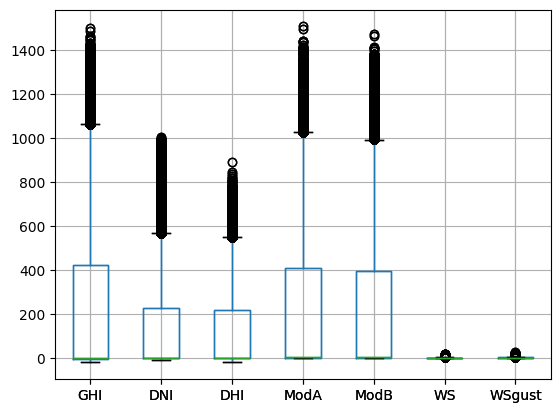

In [25]:
# Identify outliers
combined_df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']].boxplot()
plt.show()

## 4. Time Series Analysis
Plot time series data for GHI, DNI, DHI, and Tamb to observe patterns.

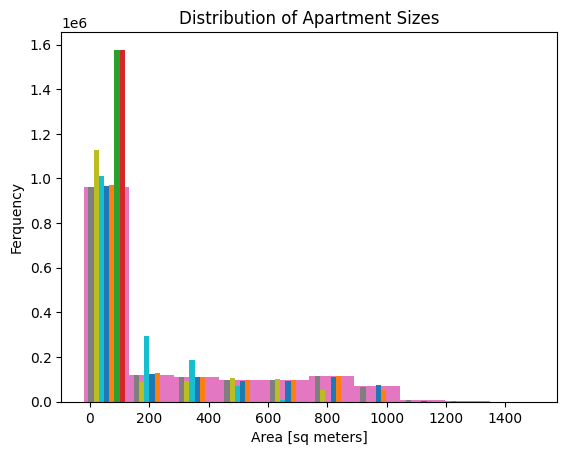

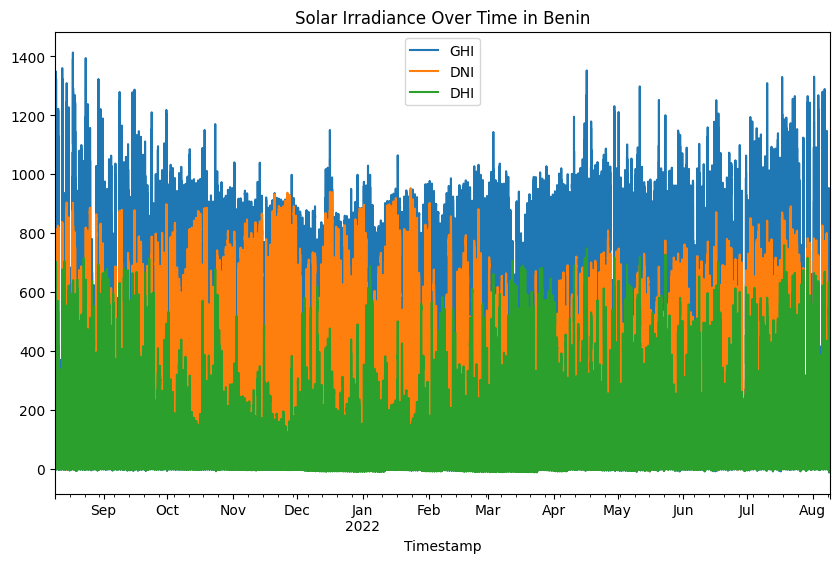

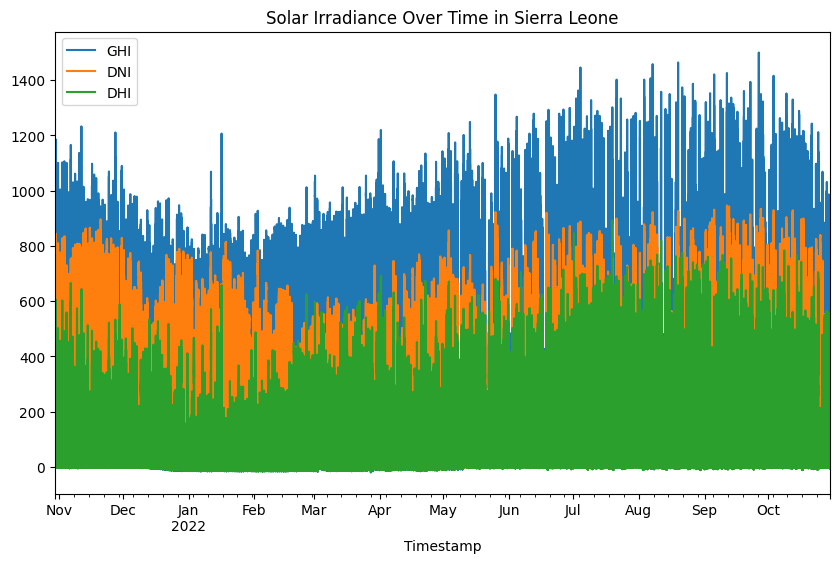

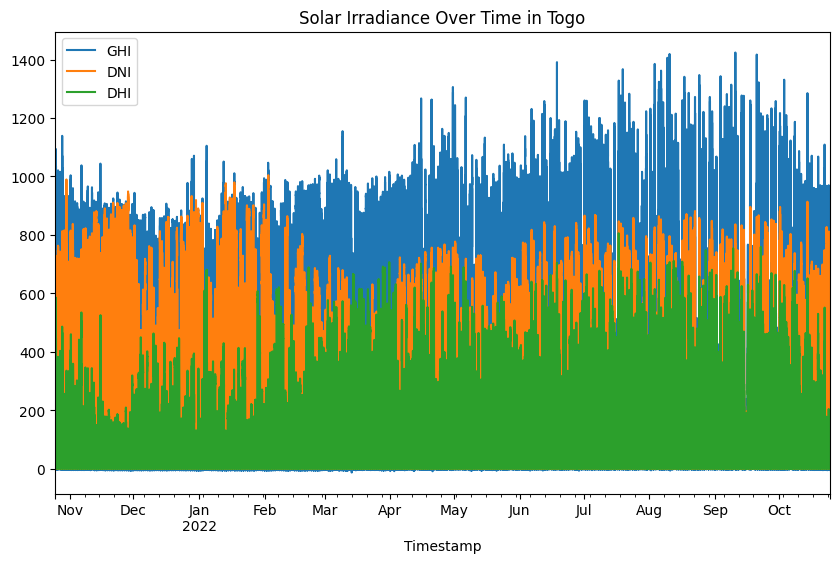

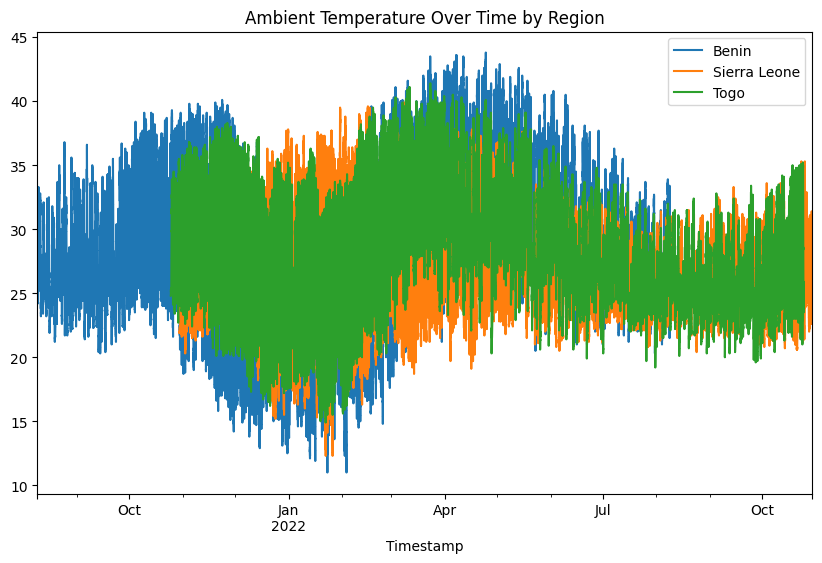

In [34]:
combined_df['Timestamp'] = pd.to_datetime(combined_df['Timestamp'])
combined_df.set_index('Timestamp', inplace=True)

# Plot GHI, DNI, DHI over time for each region
for region in combined_df['Region'].unique():
    region_df = combined_df[combined_df['Region'] == region]
    region_df[['GHI', 'DNI', 'DHI']].plot(figsize=(10, 6), title=f'Solar Irradiance Over Time in {region}')
    plt.show()

# Plot ambient temperature over time
combined_df.groupby('Region')['Tamb'].plot(legend=True, figsize=(10, 6))
plt.title('Ambient Temperature Over Time by Region')
plt.show()

## 5. Impact of Cleaning
Assess how cleaning affects sensor readings over time.

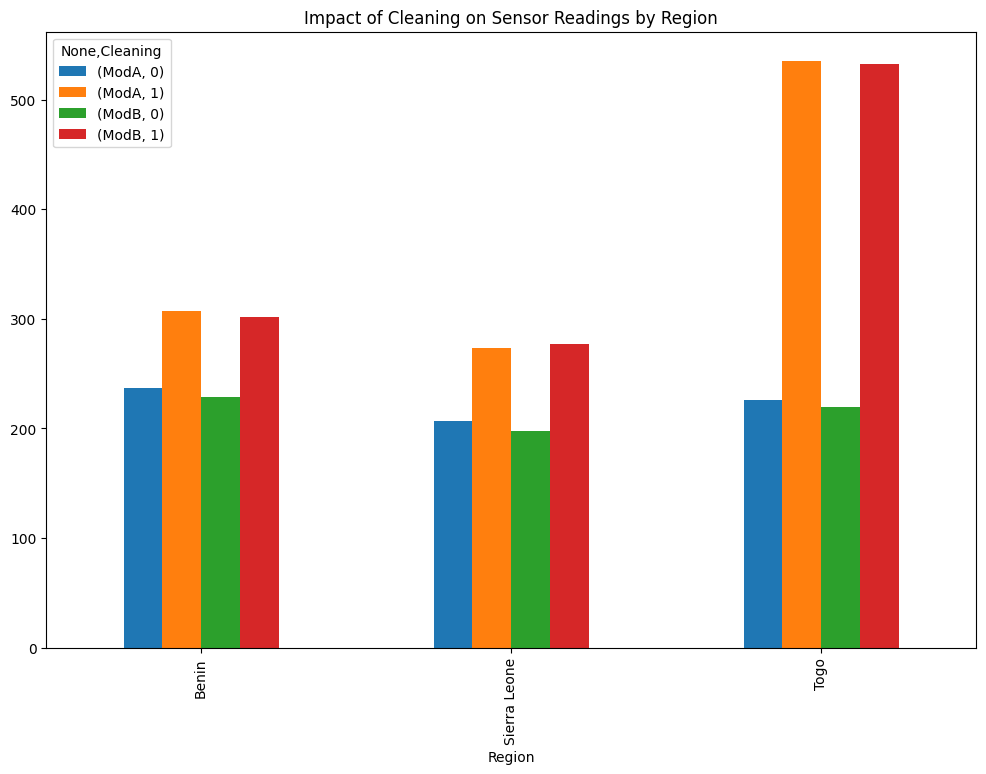

In [36]:
# Group by cleaning status and plot ModA and ModB
combined_df.groupby(['Region', 'Cleaning'])[['ModA', 'ModB']].mean().unstack().plot(kind='bar', figsize=(12, 8))
plt.title('Impact of Cleaning on Sensor Readings by Region')
plt.show()